In [1]:
import numpy as np
import matplotlib.pyplot as plt

(-6.0, 8.0)

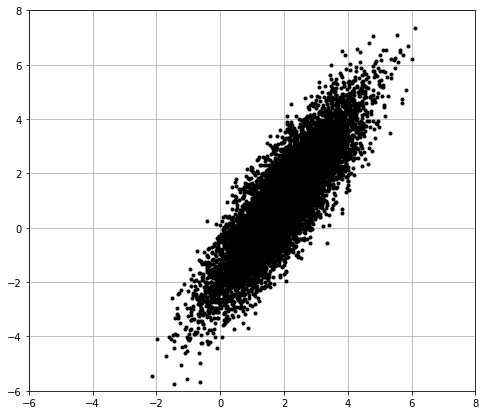

In [2]:
x_c = np.array([2, 1]) # center of data
sig = np.array([2, 0.5])  # principal axes

# rotate by pi/3
theta = np.pi/3

# rotation matrix
R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

n_points = 10000
x_origin = R @ np.diag(sig) @ np.random.randn(2, n_points) # points centered at origin
x = x_origin + np.diag(x_c) @ np.ones((2, n_points)) # shift to arbitrary center x_c

fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(x[0, :], x[1, :], '.', color='k')
ax.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))




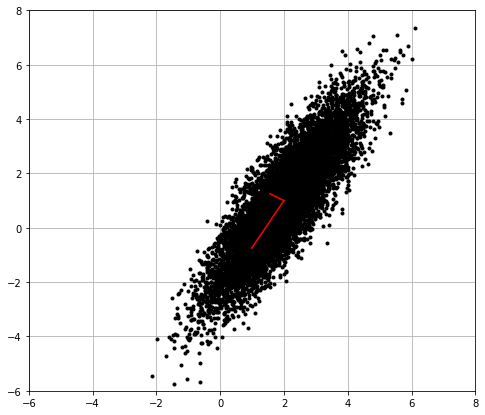

In [3]:
# compute mean
x_mean = np.mean(x, axis=1)

# subtract mean from data to center the points at the origin
x_s = x - (np.ones((10000, 2))*x_mean).T

# pca via svd
U, S, VT = np.linalg.svd(x_s/np.sqrt(n_points), full_matrices=False)

# plot
fig, ax = plt.subplots(figsize=(8, 7))
ax.plot(x[0, :], x[1, :], '.', color='k')
ax.grid()
plt.xlim((-6, 8))
plt.ylim((-6, 8))

# plot principal axes
ax.plot(np.array([x_mean[0], x_mean[0]+U[0,0]*S[0]]),
         np.array([x_mean[1], x_mean[1]+U[1, 0]*S[0]]), '-', color='r')
        
ax.plot(np.array([x_mean[0], x_mean[0]+U[0,1]*S[1]]),
         np.array([x_mean[1], x_mean[1]+U[1, 1]*S[1]]), '-', color='r')
         


# High dimensional data

In [4]:
# use sklearn's breast cancer toy dataset which consists of 30 dimensions
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
x = data['data']
y = data['target']

print(x.shape)


(569, 30)


In [5]:
# preprocess - subtract mean to center the data
mean = np.mean(x, axis=0)
x = x - mean

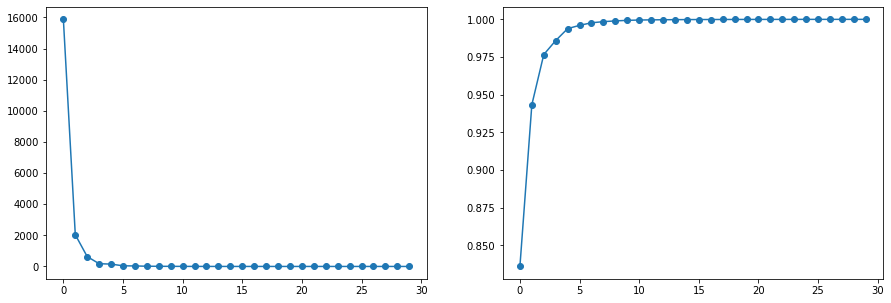

In [6]:
# svd of data
u, s, v = np.linalg.svd(x, full_matrices=False)

# plot
fig, ax = plt.subplots(figsize=(15, 5), ncols=2)
# singular values
ax[0].plot(np.arange(x.shape[1]), s[:x.shape[1]], '-o')
# total variation over different K
ax[1].plot(np.cumsum(s)/np.sum(s), '-o')

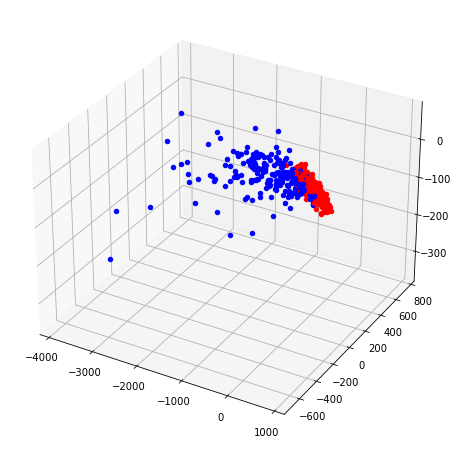

In [7]:
# from the plot, we can see that we can retain most of the information with just 3 PC
# pick the first 3 PC on which to project the original observations
pc_3 = u[:,:3]@np.diag(s[:3])

# plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
for i in range(x.shape[0]):
    if y[i] == 1:
        ax.scatter(pc_3[i, 0], pc_3[i, 1], pc_3[i,2], color='r')
    else:
        ax.scatter(pc_3[i, 0], pc_3[i, 1], pc_3[i,2], color='b')
plt.show()


# Image compression

In [8]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [9]:
img = ImageOps.grayscale(Image.open('image.jpg'))
img_array = np.asarray(img)

In [10]:
# shape of image
img_array.shape

(667, 1000)

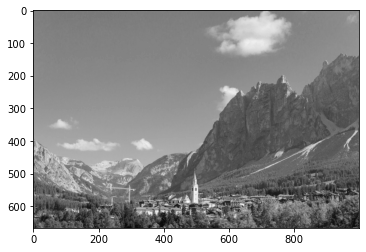

In [11]:
# original uncompressed image
plt.imshow(img_array, cmap='gray')


In [12]:
# svd of image
u, s, vt = np.linalg.svd(img_array, full_matrices=False)

In [13]:
for i in [u,s,vt]:
    print(i.shape)

(667, 667)
(667,)
(667, 1000)


In [14]:
def compress_img(u, s, vt, k):
    # reconstruct matrix from the top-k principal component
    new_img_array = u[:,:k]@np.diag(s[:k])@vt[:k,:]
    return new_img_array

K = 200
new_img_array = compress_img(u, s, vt, K)

In [15]:
def mse(original, new):
    assert original.shape == new.shape
    return np.sum((original-new)**2)/np.multiply(*original.shape)

mse(img_array, new_img_array)

8.428236071654188

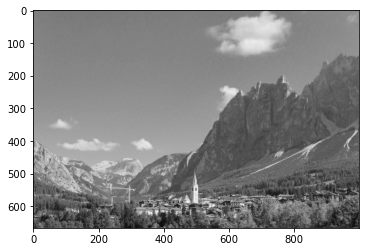

In [16]:
# compressed image - we are able to recover a lot of the details with just a fraction of PC
plt.imshow(new_img_array, cmap='gray')


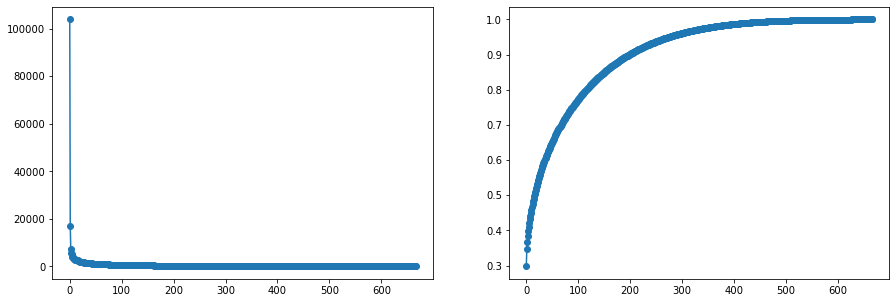

In [18]:
# plot
fig, ax = plt.subplots(figsize=(15,5), ncols=2)
# singular values
ax[0].plot(np.arange(img_array.shape[0]), s[:img_array.shape[0]], '-o')
# total variation over different K
ax[1].plot(np.cumsum(s)/np.sum(s), '-o')

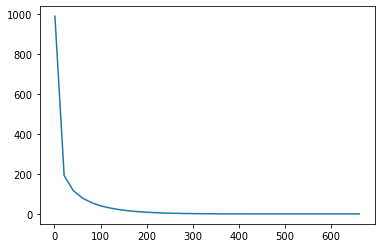

In [19]:
# mse over different K components
all_mse = []
all_k = list(range(1, min(img_array.shape), 20))
for i in all_k:
    new_img_array = compress_img(u, s, vt, i)
    all_mse.append(mse(img_array, new_img_array))

# line plot
plt.plot(all_k, all_mse)
plt.show()